# <center> **Image Quantization** </center>
## <font size=4> **Visión por Computadora 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee

# Image Quantization

Consiste en reducir la cantidad de valores en una imagen (tonos de gris o tonos de color). La idea es crear "grupos" de píxeles con valores parecidos, y estos grupos toman un valor en común.

Una forma simple de crear una imagen cuantizada es mediante la función mayor entero.

### Ejemplo

In [2]:
x = np.linspace(-1, 1, 1001)
y = 250*(1.1-x*np.log(2+x)*np.exp(1-x))

In [3]:
y = y + y.min()
y = y/y.max()
y = y*255

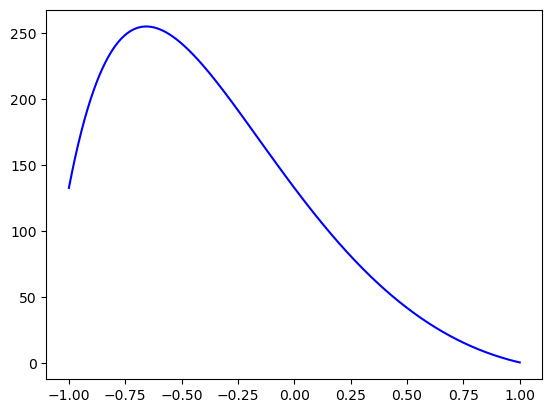

In [4]:
plt.figure()
plt.plot(x, y, 'b-')
plt.show()

In [5]:
N = 25

In [6]:
k = 255 // N

In [7]:
k

10

In [8]:
y2 = k*np.floor(y/k)

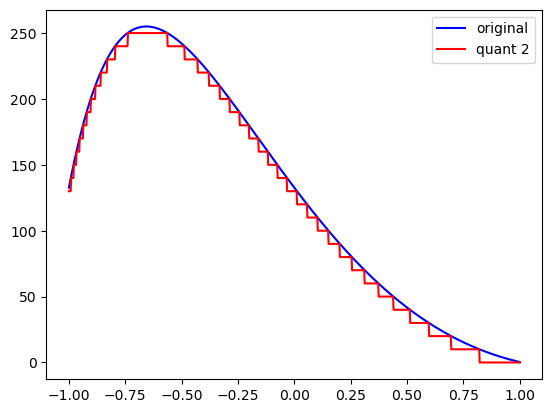

In [9]:
plt.figure()
plt.plot(x, y, 'b-', label='original')
plt.plot(x, y2, 'r-', label='quant 2')
plt.legend()
plt.show()

In [10]:
y02 = 2*np.floor(y/2)
y04 = 4*np.floor(y/4)
y08 = 8*np.floor(y/8)
y16 = 16*np.floor(y/16)
y32 = 32*np.floor(y/32)
y64 = 64*np.floor(y/64)
y128 = 128*np.floor(y/128)

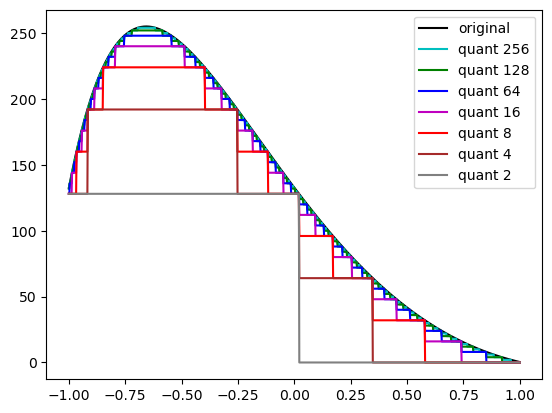

In [11]:
plt.figure()
plt.plot(x, y, 'k-', label='original')
plt.plot(x, y02, 'c-', label='quant 256')
plt.plot(x, y04, 'g-', label='quant 128')
plt.plot(x, y08, 'b-', label='quant 64')
plt.plot(x, y16, 'm-', label='quant 16')
plt.plot(x, y32, 'r-', label='quant 8')
plt.plot(x, y64, 'brown', label='quant 4')
plt.plot(x, y128, 'gray', label='quant 2')
plt.legend()
plt.show()

# Ejemplo

In [12]:
I = plt.imread('tree.jpg')
I.shape

(639, 960, 3)

In [13]:
I = rgb2gray(I)

In [14]:
print(I.min(), I.max())

0.0 1.0


In [15]:
I = (255*I).astype(np.uint8)

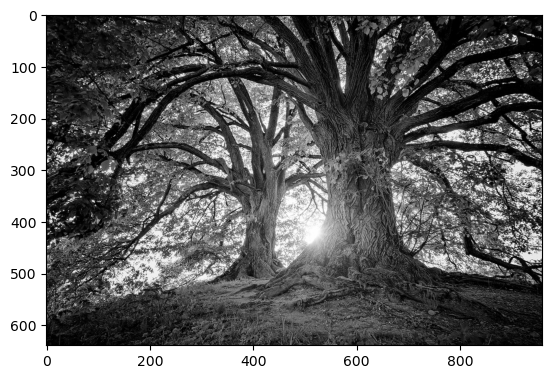

In [16]:
plt.figure()
plt.imshow(I, cmap='gray')
plt.show()

In [17]:
# número de clases
N = 2 

In [18]:
k = 256//N
print(k)

128


In [19]:
Q = k*(I//k)

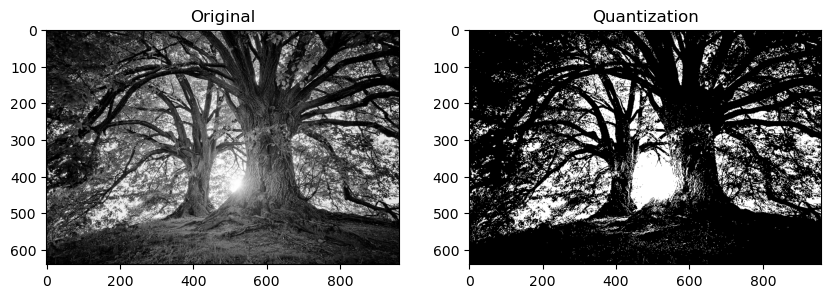

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(I, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(Q, cmap='gray')
plt.title('Quantization')
plt.show()

In [21]:
I[100:110, 100:110]

array([[30, 18, 18, 32, 23, 32, 38, 44, 51, 56],
       [12,  5, 10, 12, 25, 25, 33, 17, 11, 17],
       [17, 14, 12,  6,  4,  9,  0,  3,  5,  6],
       [13, 14, 13,  8,  9,  0,  0,  7, 15, 27],
       [10, 18, 13, 13,  6,  3,  5, 15, 21, 26],
       [12,  7,  1,  3,  2,  8,  2,  2,  9,  8],
       [23,  2,  7,  0,  0,  0,  1,  3,  1,  6],
       [28,  6,  5,  2,  2,  0,  0,  2,  3, 12],
       [62, 64, 67, 72, 12,  5, 25, 38, 29, 34],
       [53, 64, 42, 22, 15, 23, 25, 34, 51, 48]], dtype=uint8)

In [22]:
Q[100:110, 100:110]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

# K-means

In [23]:
data = load_iris()

In [24]:
X = data['data']
y = data['target']

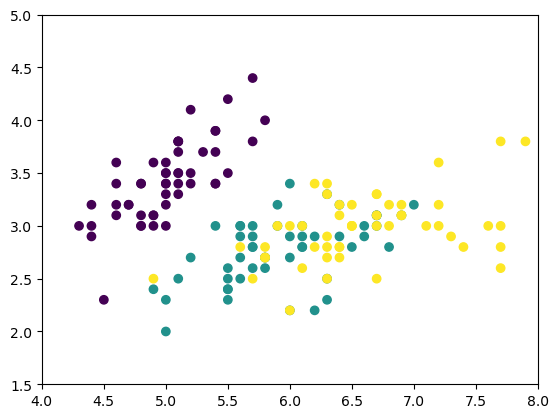

In [25]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [26]:
k = 3
centers, labels, u = k_means(X, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

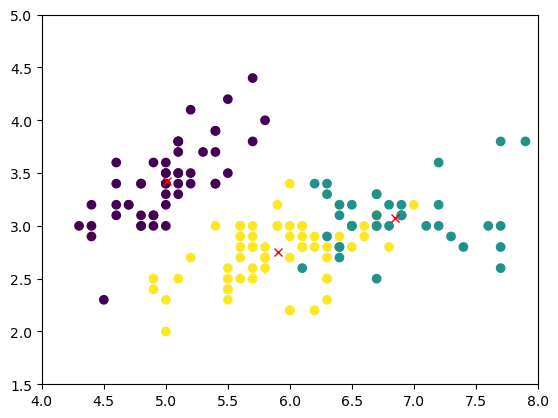

In [28]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.plot(centers[:,0], centers[:,1], 'rx', lw=10)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

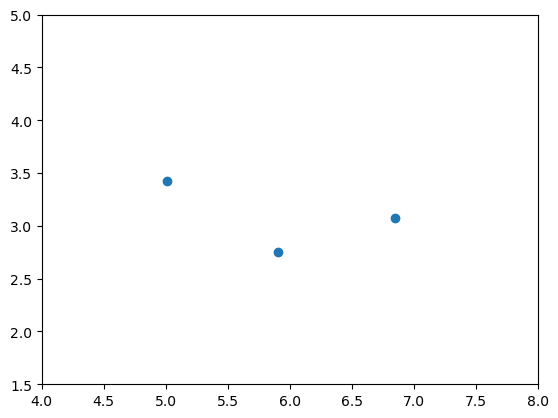

In [29]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [30]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
(labels == y).sum() / len(y)

0.8933333333333333

# Image Quantization via K-means

In [32]:
I = plt.imread('horse.jpg')
#I = plt.imread('playa.jpeg')
I = I[:,:,:3]

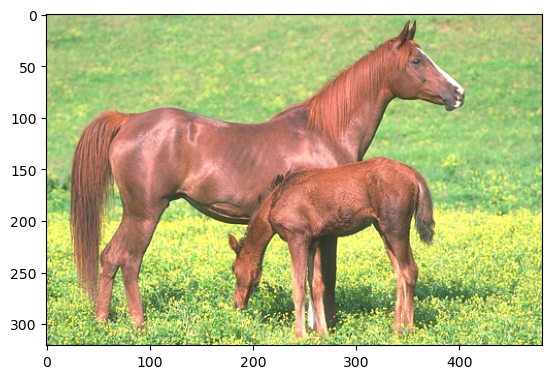

In [33]:
plt.figure()
plt.imshow(I)
plt.show()

In [34]:
sh = I.shape
sh

(321, 481, 3)

In [35]:
I[0,0,:]

array([58, 63, 40], dtype=uint8)

In [36]:
# Convert to 8bits format
#I = (255 * I).astype(np.uint8)

In [37]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [38]:
Iflat.shape

(154401, 3)

In [39]:
Iflat[:10]

array([[ 58,  63,  40],
       [ 55,  64,  33],
       [136, 149, 105],
       [194, 213, 157],
       [184, 209, 144],
       [168, 195, 128],
       [168, 197, 133],
       [156, 184, 123],
       [159, 187, 126],
       [163, 189, 126]], dtype=uint8)

In [40]:
k = 12     # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
labels.shape

(154401,)

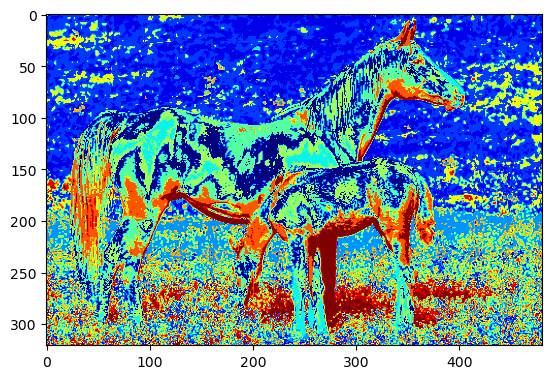

In [42]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='jet')
plt.show()

In [43]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i]

result = result.reshape(sh).astype(np.uint8)

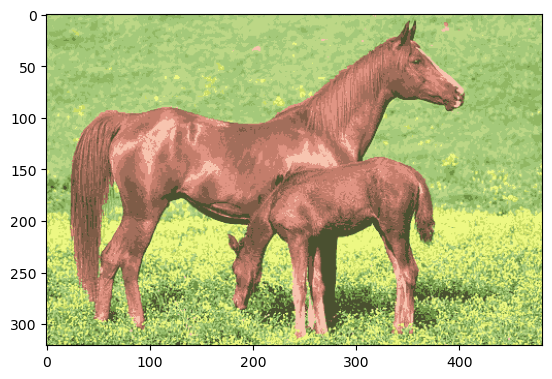

In [44]:
plt.figure()
plt.imshow(result)
plt.show()

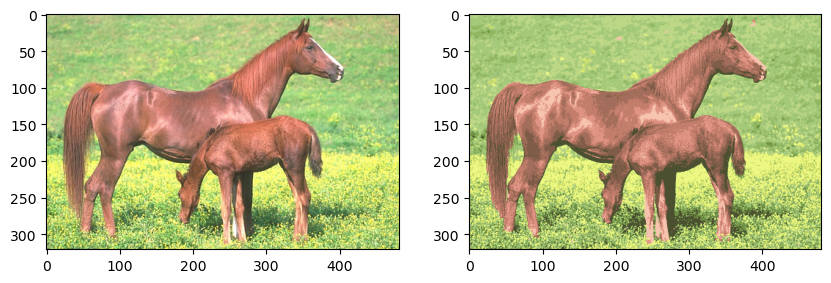

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

## Image Quantization

In [46]:
I = plt.imread('tree.jpg')

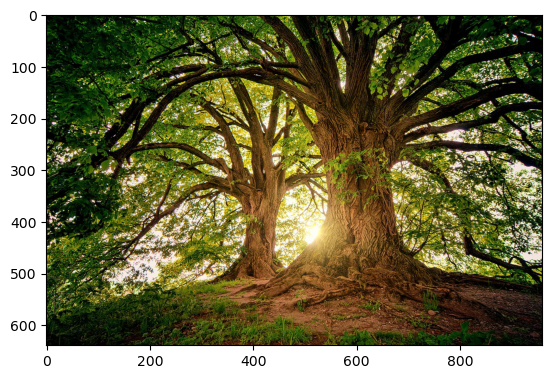

In [47]:
plt.figure()
plt.imshow(I)
plt.show()

In [48]:
sh = I.shape
sh

(639, 960, 3)

In [49]:
I[0,0,:]

array([ 3, 14,  8], dtype=uint8)

In [50]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [51]:
Iflat.shape

(613440, 3)

In [52]:
Iflat[:10]

array([[ 3, 14,  8],
       [ 3, 13,  5],
       [ 7, 15,  2],
       [ 8, 23,  2],
       [ 5, 32,  1],
       [ 3, 41,  2],
       [ 7, 49,  9],
       [20, 54, 21],
       [21, 41, 16],
       [20, 31, 15]], dtype=uint8)

In [53]:
k = 8      # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


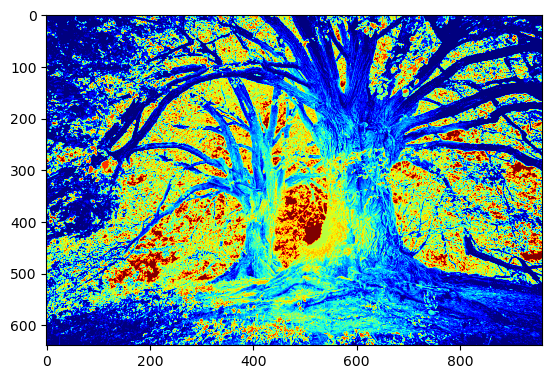

In [54]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='jet')
plt.show()

In [55]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

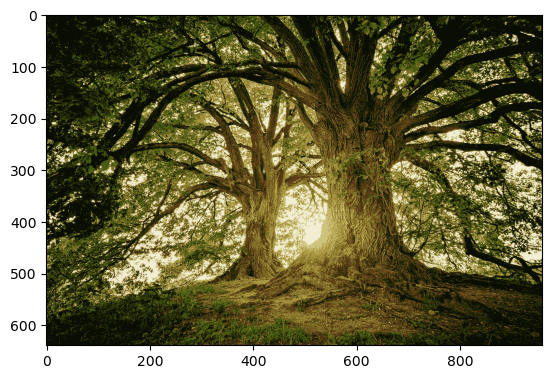

In [56]:
plt.figure()
plt.imshow(result)
plt.show()

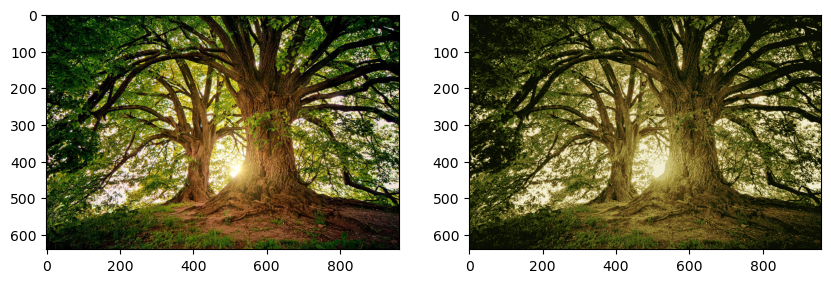

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### Otro ejemplo

In [58]:
from skimage.data import chelsea

In [59]:
#I = chelsea()
I = plt.imread('playa.jpeg')
#I = I[:,:,:3]

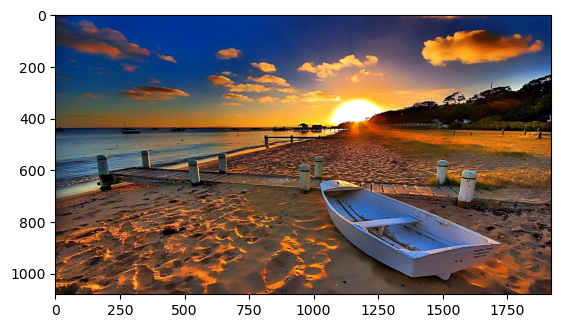

In [60]:
plt.figure()
plt.imshow(I)
plt.show()

In [61]:
sh = I.shape
sh

(1080, 1920, 3)

In [62]:
I[0,0,:]

array([ 1, 35, 63], dtype=uint8)

In [63]:
# Convert to 8bits format
#I = (255 * I).astype(np.uint8)

In [64]:
Iflat = I.reshape(-1,3)

In [65]:
k = 16
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='lloyd', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


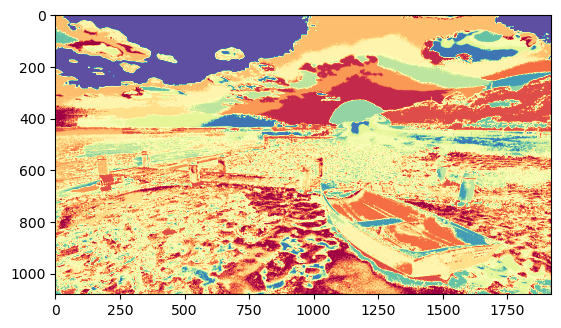

In [66]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [67]:
result = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

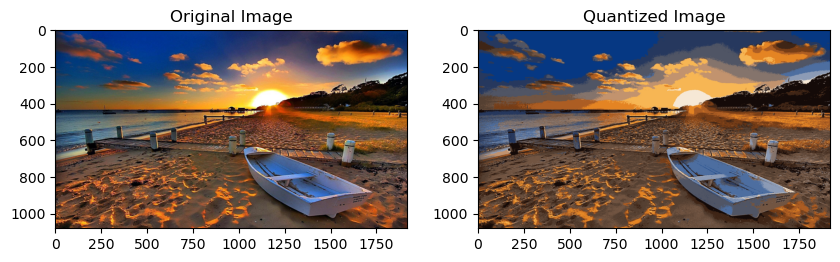

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Quantized Image')
plt.show()

# Cambiando a Otro Espacio de Color

In [69]:
from skimage.color import rgb2hsv, rgb2lab, rgb2luv, rgb2rgbcie, rgb2xyz, rgb2ycbcr, rgb2yuv

In [70]:
J = rgb2yuv(I)

In [71]:
Jflat = J.reshape(-1,3)
Jflat.shape

(2073600, 3)

In [72]:
k = 16
centers2, labels2, u2 = k_means(Jflat, n_clusters=k, algorithm='auto', init='random')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


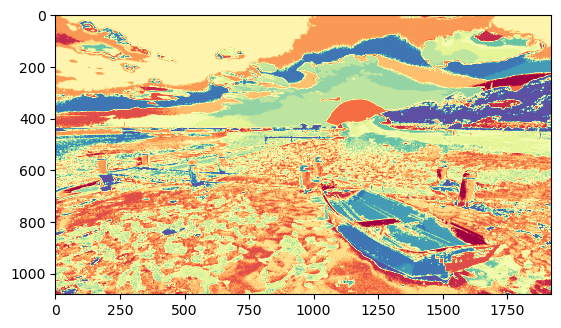

In [73]:
plt.figure()
plt.imshow(labels2.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [74]:
result2 = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result2[labels2 == i] = centers[i] 

result2 = result2.reshape(sh).astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


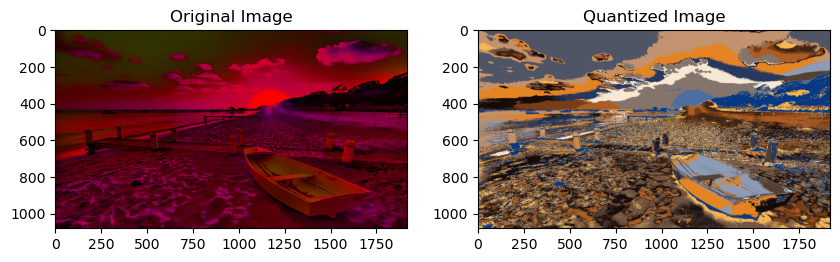

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(J)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result2)
plt.title('Quantized Image')
plt.show()